In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import ConvexHull
from matplotlib.colors import to_rgba


In [4]:
# Get the data and store it

data_url = "https://raw.githubusercontent.com/ozturkfemre/unsupervisedlearning/main/dataset/wdbc.data"
colnames = ["ID", "Diagnosis", "radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave.points", "symmetry", "fractal.dimension"]
data_frame_with_diagnosis = pd.read_csv(data_url, header=None, usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
data_frame_with_diagnosis.columns = colnames
data_frame_with_diagnosis.head() 


,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
# Remove the ID and diagnosis columns    

data_frame_without_diagnosis = data_frame_with_diagnosis.drop(["ID", "Diagnosis"], axis = 1)
data_frame_without_diagnosis.head()


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [6]:
data_frame_without_diagnosis.describe().T

,count,mean,std,min,25%,50%,75%,max
radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave.points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal.dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [7]:
correlation_matrix = data_frame_without_diagnosis.corr()
correlation_matrix

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave.points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal.dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<Axes: >

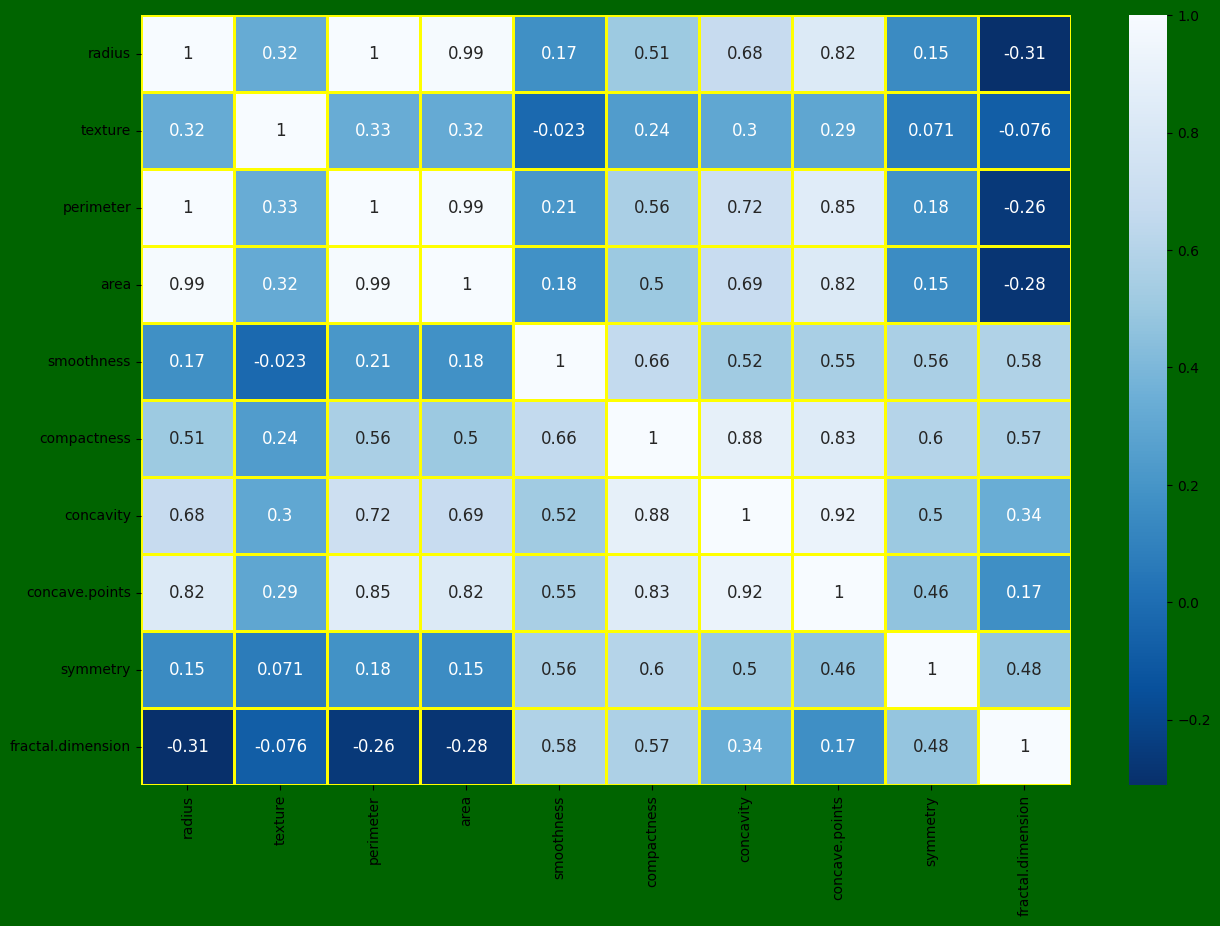

In [8]:
off_white = "#fbf9f4"
dark_green = "#006400"
figure = plt.figure(figsize=(15,10))
figure.patch.set_facecolor(off_white)
figure.set_facecolor(dark_green)
sns.color_palette("mako", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 12}, cmap="Blues_r", linewidths=2, linecolor='yellow')

In [9]:
data_frame_without_diagnosis.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [10]:
scaler = StandardScaler()
scaled_data_frame = scaler.fit_transform(data_frame_without_diagnosis)  # Standardize the data

In [11]:
# Initialize PCA, and reduce data to 2 components
pca_call = PCA(n_components=2)
principal_components = pca_call.fit_transform(scaled_data_frame)
data_frame_of_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Explained variance ratio
# explained_variance_ratio_ tells you how much of the variance is captured by each principal component.
print(f"Explained Variance Ratio: {pca_call.explained_variance_ratio_}")
# cumsum() shows the cumulative explained variance across components.
print(f"Cumulative Explained Variance: {pca_call.explained_variance_ratio_.cumsum()}")

Explained Variance Ratio: [0.5478588  0.25187136]
Cumulative Explained Variance: [0.5478588  0.79973016]


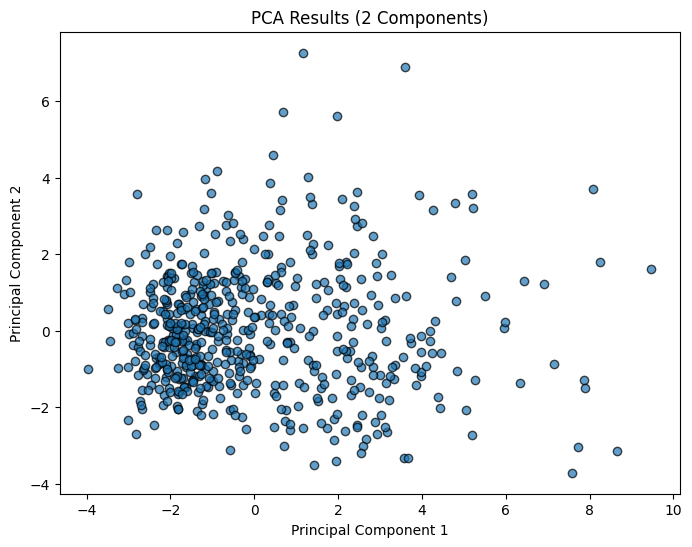

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results (2 Components)')
plt.show()


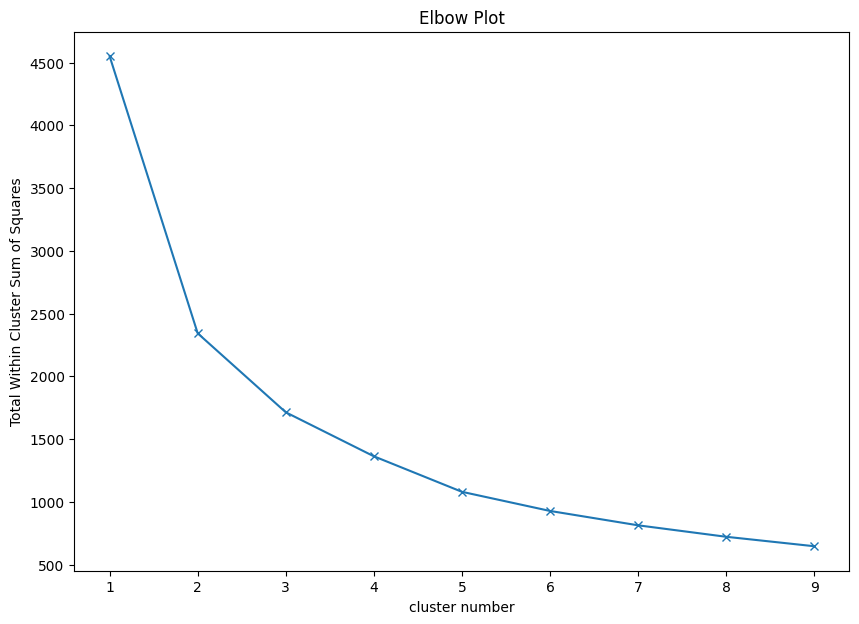

In [13]:
# Now we know the two principal components lets do some clustering with k-means analysis. 
# Here we are trying to work out the optimal number of clusters

Sum_of_squared_distances = []
K = range(1,10)
# we'll try all clusters between 1-10 and see where the drop of in sum of squares for cluster is. 
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, n_init=25)
 kmeans.fit(data_frame_of_pca)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K,Sum_of_squared_distances, 'x-')
plt.xlabel('cluster number') 
plt.ylabel('Total Within Cluster Sum of Squares') 
plt.title('Elbow Plot')
plt.show()


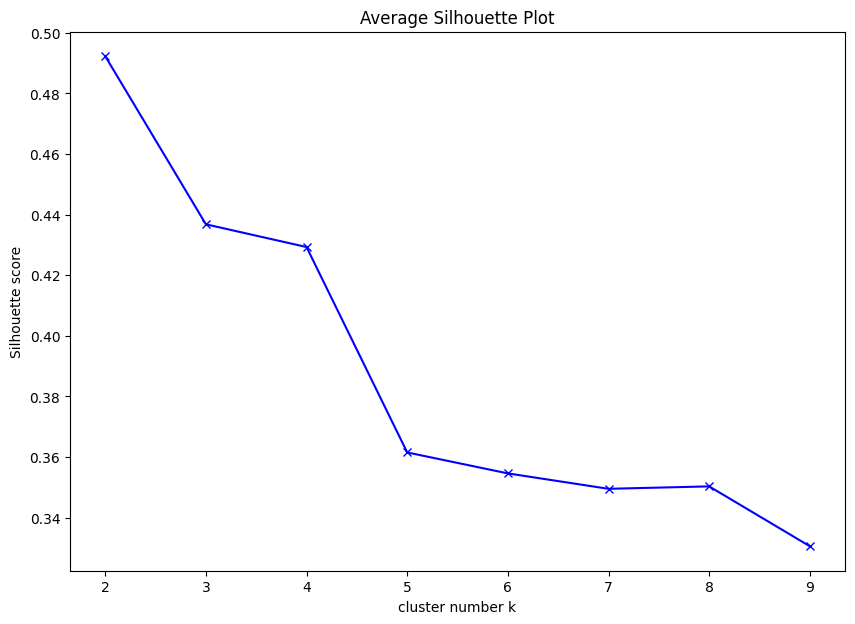

In [14]:
# Elbow doesn't give us much indicator - except a bit drop between 1-2. We can double check with silhouette

K = range(2, 10)
silhouette_avg = []
for num_clusters in K:
 
 # initialise kmeans
 km = KMeans(n_clusters=num_clusters, n_init=25)
 km.fit(data_frame_of_pca)
 cluster_labels = km.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(data_frame_of_pca, cluster_labels))

plt.figure(figsize=(10,7))
plt.plot(K,silhouette_avg,'bx-')
plt.xlabel('cluster number k') 
plt.ylabel('Silhouette score') 
plt.title('Average Silhouette Plot')
plt.show()

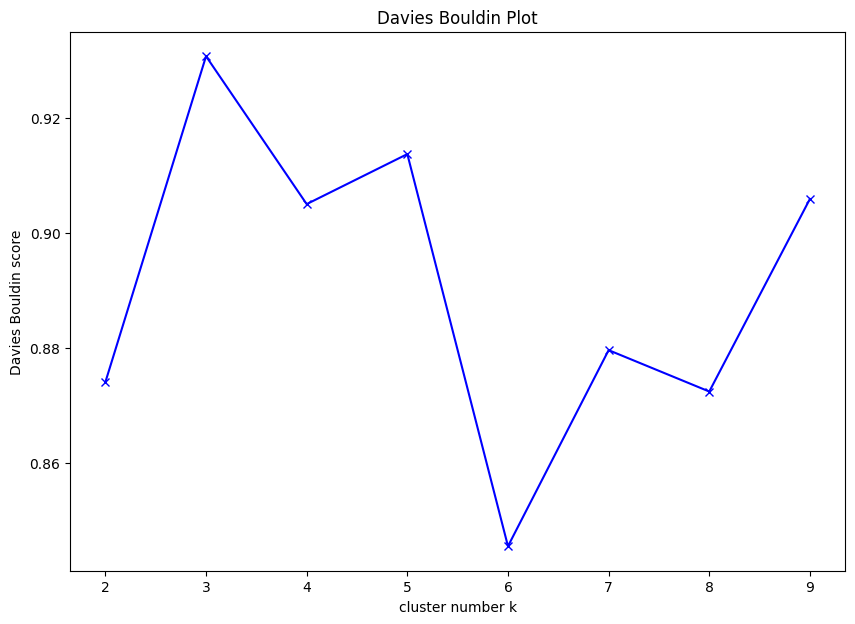

In [15]:
# But if we want to, we could also check the Davies Bouldin score too, this gives a surprising result of 6...
K = range(2, 10)
db = []
for num_clusters in K:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, n_init=25)
 kmeans.fit(data_frame_of_pca)
 cluster_labels = kmeans.fit_predict(data_frame_of_pca)
 
 # silhouette score
 db.append(davies_bouldin_score(data_frame_of_pca, cluster_labels))


plt.figure(figsize=(10,7))
plt.plot(K,db,'bx-')
plt.xlabel('cluster number k') 
plt.ylabel('Davies Bouldin score') 
plt.title('Davies Bouldin Plot')
plt.show()

In [16]:
# lets k means it for a cluster of 2
# clustering
kmeans2 = KMeans(n_clusters=2, random_state=0, n_init=25, algorithm='lloyd') 
kmeans2.fit(data_frame_of_pca)

# output
zero = []
one = []
for i in kmeans2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [ 3.00438761 -0.07488982] 
 Cluster 1 : [-1.29082985  0.03217628] 
 
 Clustering vector: 
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 

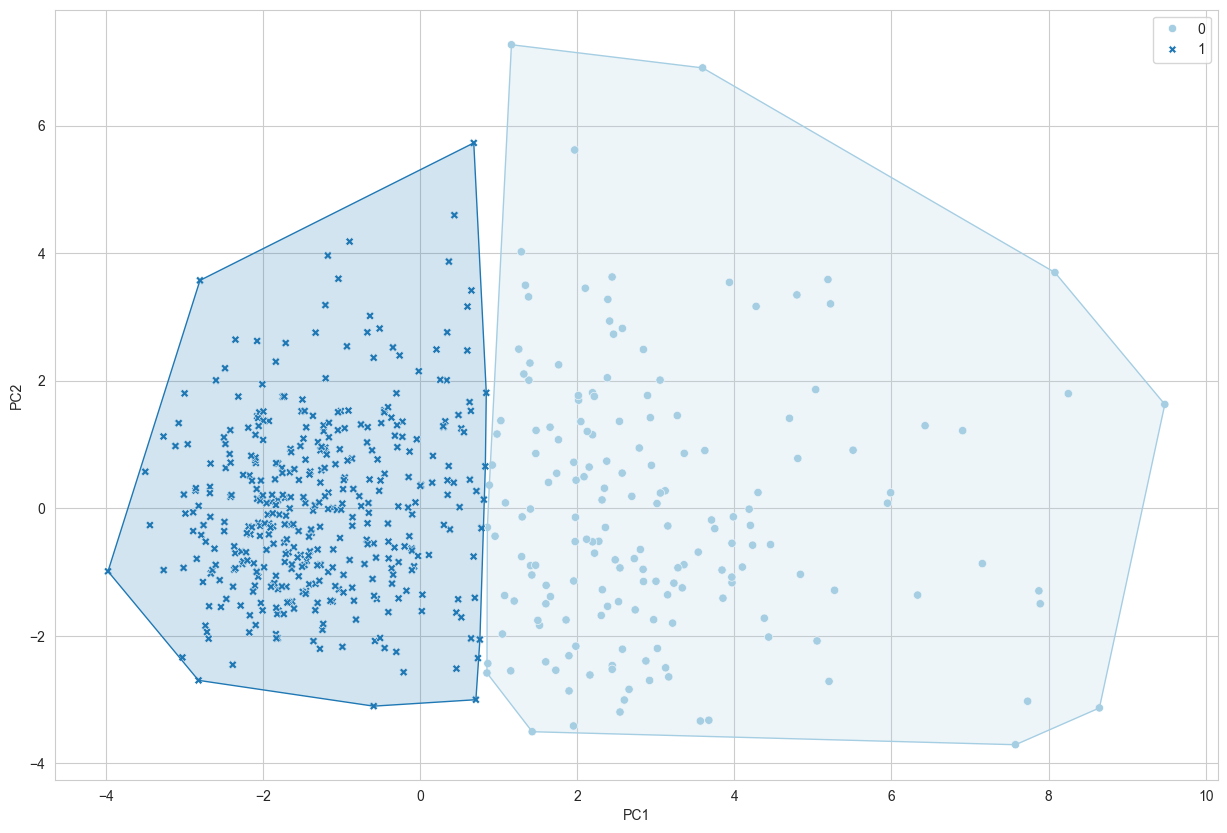

In [22]:
# Now we're cooking, lets have a look how the clusters look

sns.set_style("whitegrid")

# Define columns for PCA axes
xcol = "PC1"
ycol = "PC2"

# Assuming kmeans2.labels_ contains the cluster labels
hues = [0, 1]  # Modify this according to your cluster labels
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}

# Create the scatter plot
plt.figure(figsize=(15, 10))
g = sns.scatterplot(data=data_frame_of_pca, x=xcol, y=ycol, hue=kmeans2.labels_, palette=palette, style=kmeans2.labels_)

# Overlay convex hulls for each cluster
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in data_frame_of_pca.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)

# Overlay convex hulls
overlay_cv_hull_dataframe(xcol, ycol, hue=kmeans2.labels_, data=data_frame_of_pca, color=palette)

# Set axis labels
plt.xlabel(xcol)
plt.ylabel(ycol)

# Show plot
plt.show()